# Regresión Lineal


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
nRowsRead = None # set None to read all lines
df = pd.read_csv('auto-mpg.csv', delimiter=',', nrows = nRowsRead)
nRow, nCol = df.shape
print(f'Hay {nRow} filas y {nCol} columnas')

Hay 398 filas y 9 columnas


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
sum(df.horsepower=='?')

6

In [ ]:
df=df[df.horsepower!='?']

In [ ]:
sum(df.horsepower=='?')

0

In [ ]:
df.horsepower=df.horsepower.astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [ ]:
# define y and X
y = np.array(df.mpg)
X = np.array(df.horsepower)

y = y.reshape(-1,1)
X = X.reshape(-1,1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
# Sort test data
inds = X_test.ravel().argsort()
X_test = X_test.ravel()[inds].reshape(-1,1)
y_test = y_test.ravel()[inds].reshape(-1,1)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_test,y_pred)

print(f'MSE: {mse}') 
print(f'R^2: {r2}')
print(f'Es decir, el {r2*100}% de la variación observada puede explicarse por las entradas del modelo')

MSE: 25.48764054559336
R^2: 0.5985030231162922
Es decir, el 59.85030231162922% de la variación observada puede explicarse por las entradas del modelo


Regresión Lineal Simple:

$mpg = \beta_0 + \beta_1 * horsepower$

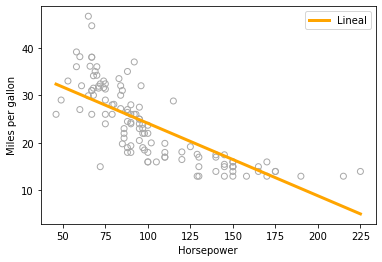

In [ ]:
plt.scatter(X_test, y_test, facecolors='none', edgecolors='darkgray')
plt.plot(X_test, y_pred, color='orange', linewidth=3, label="Lineal")

plt.legend()
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.show() 

Del gráfico anterior se nota que una línea de regresión lineal puede no ser la mejor solución para capturar las relaciones entre la respuesta y los predictores con precisión. En algunos casos, una línea curva podría funcionar mejor.

# Regresión Polinomial

La regresión polinomial es un intento de crear una función polinomial que se ajuste a un conjunto de puntos de datos.

Para el dataset Auto-mpg:

- La función polinomial de grado 1 tiene la forma:

  $mpg = \beta_0 + \beta_1 * horsepower + \epsilon_1$ (Regresión Lineal Simple)

- La regresión cuadrática es un polinomio de grado 2:

  $mpg = \beta_0 + \beta_1 * horsepower + \beta_2 * horsepower^2 + \epsilon_2$

- Para un polinomio de grado 3, la fórmula es la siguiente:

  $mpg = \beta_0 + \beta_1 * horsepower + \beta_2 * horsepower^2 + \beta_3 * horsepower^3 + \epsilon_3$

- En general, un polinomio de grado n tiene la fórmula de:

  $mpg = \beta_0 + \beta_1 * horsepower + \beta_2 * horsepower^2 + \dots + \beta_d * horsepower^d + \epsilon_d$

Notamos que la ecuación general implica predecir $mpg$ usando una función no lineal de $horsepower$. **¡Pero sigue siendo un modelo lineal!** Es decir, este es simplemente un modelo de regresión lineal múltiple con $X_1 = horsepower$ y ​​$X_2 = horsepower^2$.



In [ ]:
# ============ Regresión cuadrática ============

from sklearn.preprocessing import PolynomialFeatures

degree = 2
polynomial_features = PolynomialFeatures(degree = degree)

Con el objeto `PolynomialFeatures` se puede generar una nueva matriz de características que consta de todas las combinaciones polinomiales de las características con un grado menor o igual al grado especificado:

In [ ]:
X_poly2_train = polynomial_features.fit_transform(X_train)
X_poly2_test = polynomial_features.fit_transform(X_test)

In [ ]:
X_poly2_train.shape

(274, 3)

In [ ]:
polynomial_features.get_feature_names('x')

['1', 'x', 'x^2']

In [ ]:
lr_poly2 = LinearRegression()
lr_poly2.fit(X_poly2_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_poly2_pred=lr_poly2.predict(X_poly2_test)

mse_poly2 = mean_squared_error(y_poly2_pred,y_test)
r2_poly2 = r2_score(y_test,y_poly2_pred)

print(f'MSE: {mse_poly2}') 
print(f'R^2: {r2_poly2}')
print(f'Es decir, el {r2_poly2*100}% de la variación observada puede explicarse por las entradas del modelo')

MSE: 20.20418046645831
R^2: 0.6817313331461603
Es decir, el 68.17313331461602% de la variación observada puede explicarse por las entradas del modelo


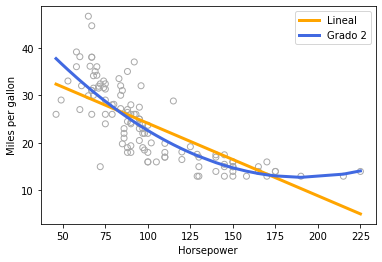

In [ ]:
plt.scatter(X_test, y_test, facecolors='none', edgecolors='darkgray')
plt.plot(X_test, y_pred, color='orange', linewidth=3, label="Lineal")
plt.plot(X_test, y_poly2_pred, color='royalblue', linewidth=3, label="Grado 2")

plt.legend()
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.show() 

In [ ]:
print(lr_poly2.intercept_)  # beta_0
print(lr_poly2.coef_)       # _, beta_1, beta_2

[56.02854479]
[[ 0.         -0.45278494  0.0011845 ]]


In [ ]:
# ============ Polinomio de grado 5 ============

degree = 5
polynomial_features = PolynomialFeatures(degree = degree)

X_poly5_train = polynomial_features.fit_transform(X_train)
X_poly5_test = polynomial_features.fit_transform(X_test)

In [ ]:
X_poly5_train.shape

(274, 6)

In [ ]:
polynomial_features.get_feature_names('x')

['1', 'x', 'x^2', 'x^3', 'x^4', 'x^5']

In [ ]:
lr_poly5 = LinearRegression()
lr_poly5.fit(X_poly5_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_poly5_pred=lr_poly5.predict(X_poly5_test)

mse_poly5 = mean_squared_error(y_poly5_pred,y_test)
r2_poly5 = r2_score(y_test,y_poly5_pred)

print(f'MSE: {mse_poly5}') 
print(f'R^2: {r2_poly5}')
print(f'Es decir, el {r2_poly5*100}% de la variación observada puede explicarse por las entradas del modelo')

MSE: 19.677999552650732
R^2: 0.6900200582562676
Es decir, el 69.00200582562675% de la variación observada puede explicarse por las entradas del modelo


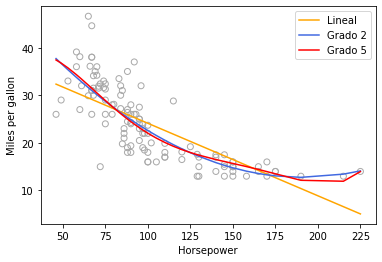

In [ ]:
plt.scatter(X_test, y_test, facecolors='none', edgecolors='darkgray')
plt.plot(X_test, y_pred, color='orange', label="Lineal")
plt.plot(X_test, y_poly2_pred, color='royalblue', label="Grado 2")
plt.plot(X_test, y_poly5_pred, color='red', label="Grado 5")

plt.legend()
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.show() 

In [ ]:
print(lr_poly5.intercept_)  # beta_0
print(lr_poly5.coef_)       # _, beta_1, beta_2, beta_3, beta_4, beta_5

[16.38564784]
[[ 0.00000000e+00  1.58397728e+00 -3.71738680e-02  3.33194312e-04
  -1.34640467e-06  2.04371831e-09]]


El ajuste resultante de la regresión polinomial de 5to grado parece innecesariamente ondulante, es decir, no está claro que incluir los términos adicionales realmente ha llevado a un mejor ajuste de los datos.

En general, es inusual usar un grado $d$ mayor que 3 o 4 porque para valores grandes de $d$, la curva del polinomio puede volverse demasiado flexible y adoptar algunas formas muy extrañas. Esto es especialmente cierto cerca del límite de la variable $X$.

In [ ]:
nRowsRead = None # set None to read all lines
wage_df = pd.read_csv('Wage.csv', delimiter=',', nrows = nRowsRead)
nRow, nCol = wage_df.shape
print(f'Hay {nRow} filas y {nCol} columnas')

Hay 3000 filas y 13 columnas


In [ ]:
wage_df.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [ ]:
wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   sex         3000 non-null   object 
 4   maritl      3000 non-null   object 
 5   race        3000 non-null   object 
 6   education   3000 non-null   object 
 7   region      3000 non-null   object 
 8   jobclass    3000 non-null   object 
 9   health      3000 non-null   object 
 10  health_ins  3000 non-null   object 
 11  logwage     3000 non-null   float64
 12  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


In [ ]:
# define y and X
y = wage_df.wage
X = wage_df.age

In [ ]:
# ============ Polinomio de grado 4 ============

degree = 4
polynomial_features = PolynomialFeatures(degree = degree)

X_poly4_train = polynomial_features.fit_transform(X.values.reshape(-1,1))
X_poly4_train.shape

(3000, 5)

In [ ]:
polynomial_features.get_feature_names('x')

['1', 'x', 'x^2', 'x^3', 'x^4']

In [ ]:
X_test = np.linspace(min(X),max(X),100)
X_poly4_test = polynomial_features.fit_transform(X_test.reshape(-1,1))

In [ ]:
lr_poly4 = LinearRegression()
lr_poly4.fit(X_poly4_train,y.values.reshape(-1,1))

y_poly4_pred=lr_poly4.predict(X_poly4_test)

In [ ]:
from tqdm import tqdm

def boot(X_data,y_data,R,test_data,model):
  predictions = []
  for i in tqdm(range(R)):
      predictions.append(alpha(X_data,y_data,get_indices(X_data,200),test_data,model))
      
  return np.percentile(predictions,2.5,axis = 0),np.percentile(predictions,97.5,axis = 0)

def alpha(X_data,y_data,index,test_data,model):
    X = X_data.loc[index]
    y = y_data.loc[index]
    
    lr = model
    lr.fit(pd.DataFrame(X),y)
    
    return lr.predict(pd.DataFrame(test_data))

def get_indices(data,num_samples):
    return  np.random.choice(data.index, num_samples, replace=True)


In [ ]:
li,ui = boot(pd.DataFrame(X_poly4_train),pd.Series(y),1000,X_poly4_test,LinearRegression())

100%|██████████| 1000/1000 [00:02<00:00, 340.70it/s]


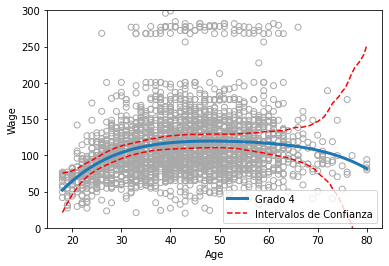

In [ ]:
plt.scatter(X,y,facecolors='none', edgecolors='darkgray')
plt.plot(X_test,y_poly4_pred,label = 'Grado 4', linewidth=3)
plt.plot(X_test,ui,linestyle = 'dashed',color = 'r',label = 'Intervalos de Confianza')
plt.plot(X_test,li,linestyle = 'dashed',color = 'r')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Wage')

plt.ylim([0, 300])

plt.show() 

En la gráfica anterior, la curva azul sólida es el resultado de ajustar un polinomio de grado 4 usando Regresión Polinomial, mientras que el par de curvas punteadas son las curvas de error estándar. 

# Seleccionar el mejor modelo

Para este ejemplo, usaremos un `pipeline` para encadenar las operaciones.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [ ]:
# Define X and y

import numpy as np

def make_data(N, err=1.0, rseed=1):
  # randomly sample the data
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  y = 10 - 1. / (X.ravel() + 0.1)
  if err > 0:
    y += err * rng.randn(N)
  return X, y
  
X, y = make_data(40)

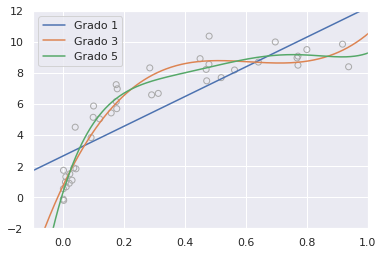

In [ ]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, facecolors='none', edgecolors='darkgray')
axis = plt.axis()

for degree in [1, 3, 5]:
  y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
  plt.plot(X_test.ravel(), y_test, label='Grado {0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')
plt.show()

El grado del polinomio (entero no negativo) controla la complejidad del modelo. Una pregunta útil para responder es la siguiente: ¿qué grado de polinomio proporciona una compensación adecuada entre **bias** (desajuste) y **varianza** (sobreajuste)?

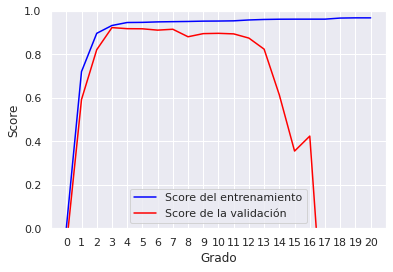

In [ ]:
# ========== Curva de validación del modelo ==========

from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(),       # modelo
                                          X, y,                         # datos
                                          'polynomialfeatures__degree', # nombre del parámetro
                                          degree,                       # rango para explorar
                                          cv=7                          # número de folds en KFold
                                          )

plt.plot(degree, np.median(train_score, 1), color='blue', label='Score del entrenamiento')
plt.plot(degree, np.median(val_score, 1), color='red', label='Score de la validación')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Grado')
plt.ylabel('Score')
plt.xticks(degree)
plt.show()

Esto muestra precisamente el comportamiento cualitativo que esperamos: 

1. El score del entrenamiento es siempre superior al score de la validación.
2. El score del entrenamiento mejora monótonamente con una mayor complejidad del modelo
3. El score de la validación alcanza un máximo antes de caer cuando el modelo se sobreajusta.

A partir de esta Curva de validación, se puede leer que el equilibrio óptimo entre **bias** y **varianza** se encuentra para un polinomio de 3er orden.

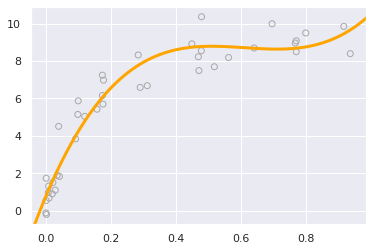

In [ ]:
plt.scatter(X.ravel(), y, facecolors='none', edgecolors='darkgray')
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, color='orange', linewidth = 3)
plt.axis(lim)
plt.show()

# Validación en la práctica: Grid Search

En la práctica, los modelos generalmente dependen de más hiperparámetros y, por lo tanto, los gráficos de las curvas de validación y aprendizaje cambian de líneas a superficies multidimensionales. En estos casos, tales visualizaciones son difíciles y preferimos simplemente encontrar el modelo particular que maximiza la puntuación de validación.

Exploraremos una cuadrícula tridimensional de características del modelo:

- el grado del polinomio
- el flag que nos dice si debemos ajustar la intersección 
- el flag que nos dice si debemos normalizar el problema

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [ ]:
grid.fit(X, y);

Ahora podemos solicitar los mejores parámetros de la siguiente manera:

In [ ]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

Finalmente, si lo deseamos, podemos usar el mejor modelo y mostrar el ajuste a nuestros datos.

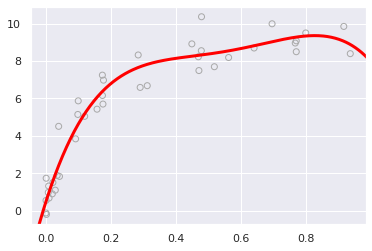

In [ ]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y, facecolors='none', edgecolors='darkgray')
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, color='red', linewidth = 3)
plt.axis(lim)
plt.show()

# Referencias

[1] James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013). *An Introduction to Statistical Learning with Applications in R.* Springer Texts in Statistics. Springer.

[2] VanderPlas, J. (2016) *Python Data Science Handbook. Essential Tools for Working with Data.* O'Reilly Media.